In [1]:
import numpy as np
import matplotlib.pyplot as plt
from analysis_tes import *
from pathlib import Path

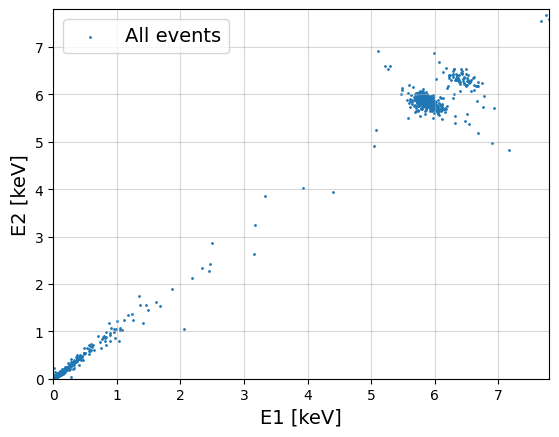

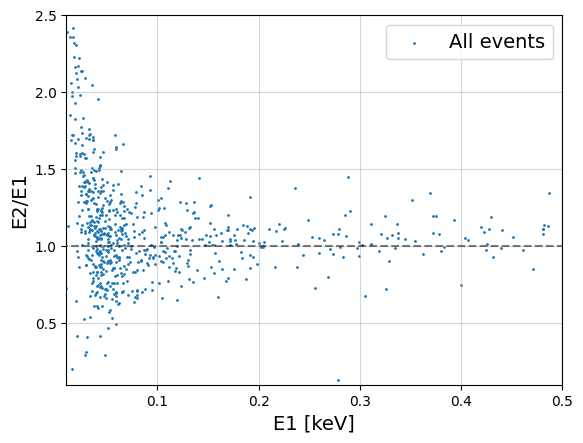

In [9]:
datafiles = Path('datafiles')

gap_Al = 3.4e-7 #keV
E_ph   = 2 * gap_Al #to break CPs
E1, E2  = np.loadtxt(datafiles / 'Ludo.xy', skiprows=4).T

plt.scatter(E1, E2, s=1, label="All events")
#plt.scatter(E1_sim, E2_sim, s=3, color="g", marker="x", label="Simulated events")
plt.xlabel('E1 [keV]', fontsize=14)
plt.ylabel('E2 [keV]', fontsize=14)
plt.legend(fontsize=14)
plt.grid(alpha=0.5)
plt.xlim(0, 7.8)
plt.ylim(0, 7.8)

plt.show()

y = E2/E1
#y_sim = E2_sim/E1_sim

plt.scatter(E1, y, s=1, label="All events")
#plt.scatter(E1_sim, y_sim, s=3, color="g", marker="x", label="Simulated events")
plt.hlines( 1, min(E1), max(E1), color='k', linestyles='dashed', alpha=0.5)
plt.xlabel('E1 [keV]', fontsize=14)
plt.ylabel('E2/E1', fontsize=14)
plt.grid(alpha=0.5)
plt.legend(fontsize=14)
plt.ylim(0.1, 2.5)
plt.xlim(0.01, 0.5)
plt.show()

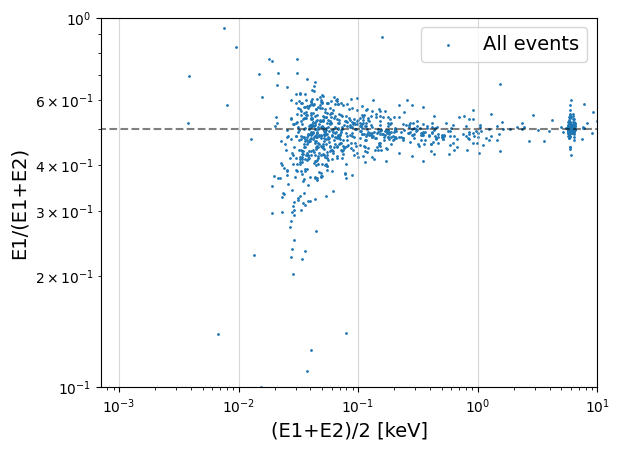

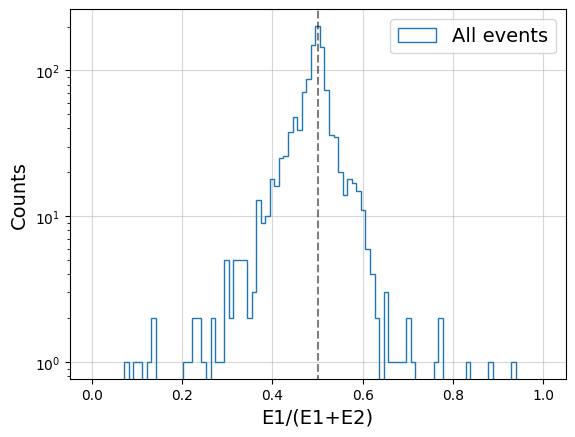

In [11]:
sum = E1 + E2

# sum_sim = E1_sim + E2_sim

plt.scatter(sum/2, E1/sum, s=1, label="All events")
# plt.scatter(sum_c/2, E1_c/sum_c, s=1, color="r", label="Coincident events")
# plt.scatter(sum_sim/2, E1_sim/sum_sim, s=3, color="g", marker="x", label="Simulated events")
plt.hlines( 0.5, min(sum), max(sum), color='k', linestyles='dashed', alpha=0.5)
plt.xlabel('(E1+E2)/2 [keV]', fontsize=14)
plt.ylabel('E1/(E1+E2)', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.grid(alpha=0.5)
plt.legend(fontsize=14)
plt.xlim(None, 10)
plt.ylim( 1e-1, 1 )
plt.show()

bins_sum = np.linspace(0, 1, 100)

plt.hist(E1/sum, bins=bins_sum, histtype='step', label="All events")
# plt.hist(E1_sim/sum_sim, bins=bins_sum, histtype='step', color="g", label="Simulated events")
plt.xlabel('E1/(E1+E2)', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.yscale('log')
plt.grid(alpha=0.5)
plt.legend(fontsize=14)
plt.vlines(0.5, 0, 1e4, color='k', linestyles='dashed', alpha=0.5)
plt.show()

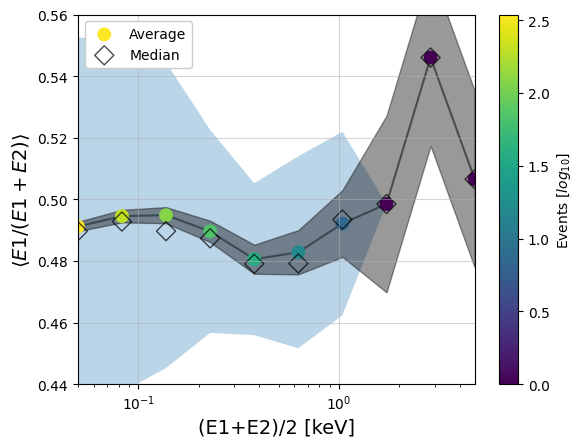

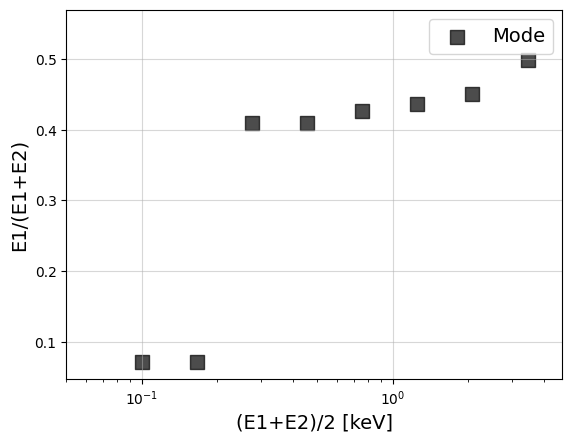

In [14]:
from scipy import stats

separation_low = np.logspace(np.log10(0.1), np.log10(9.5), 10)
sep_step = 0.5

mean_frac = []
std_frac = []
nums_frac = []
median_frac = []
mode_frac = []

for sep in separation_low:
    condition = (sum > sep) & (sum < sep + sep_step)
    E1_sep = E1[condition]
    sum_sep = sum[condition]
    mean_frac.append(np.mean(E1_sep/sum_sep))
    std_frac.append(np.std(E1_sep/sum_sep))
    nums_frac.append(len(E1_sep))
    median_frac.append(np.median(E1_sep/sum_sep))
    mode_frac.append(stats.mode(E1_sep/sum_sep)[0])

nums_frac = np.array(nums_frac)
avg_std = np.mean(std_frac)
avg_on_the_mean = avg_std/np.sqrt(nums_frac)
col = np.log10(nums_frac)
plt.plot(separation_low/2, mean_frac, color='k', alpha=0.5, zorder=-2)
plt.scatter(separation_low/2, mean_frac, marker='o', s=80, c=col, cmap='viridis', label="Average")
plt.fill_between(separation_low/2, np.array(mean_frac) - np.array(std_frac), np.array(mean_frac) + np.array(std_frac), alpha=0.3, zorder=-2)
plt.fill_between(separation_low/2, np.array(mean_frac) - avg_on_the_mean, np.array(mean_frac) + avg_on_the_mean, color="k", alpha=0.4, zorder=-2)
plt.scatter(separation_low/2, median_frac, marker='D', s=95, facecolors='none', color='k', label="Median", alpha=0.7)
plt.scatter(separation_low/2, col, marker='o', s=80, c=col, cmap='viridis', alpha=1)
plt.xlabel('(E1+E2)/2 [keV]', fontsize=14)
plt.ylabel(r'$\langle E1/(E1+E2) \rangle$', fontsize=14)
plt.grid(alpha=0.5)
plt.colorbar(label=r"Events [$log_{10}$]")
plt.xscale('log')
plt.xlim(0.1/2, 9.5/2)
plt.ylim(0.44, 0.56)
legend = plt.legend(facecolor=(1, 1, 1, 1))
legend.get_frame().set_alpha(None)
plt.show()

plt.scatter(separation_low, mode_frac, marker='s', s=95, color='k', label="Mode", alpha=0.7)
plt.xlabel('(E1+E2)/2 [keV]', fontsize=14)
plt.ylabel(r'E1/(E1+E2)', fontsize=14)
plt.grid(alpha=0.5)
plt.xscale('log')
plt.xlim(0.1/2, 9.5/2)
plt.legend(fontsize=14)
plt.show()

In [36]:
col

array([2.85064624, 2.6180481 , 2.40993312, 2.17897695, 1.93951925,
       1.69019608, 1.63346846, 1.74818803, 1.64345268, 1.78532984])

In [5]:
n_sims = 10_000 #Number of phonons, proportional to energy

d1 = 2 # cm 
d2 = 2 # cm
z = 0.04 # cm

#By dividing by the dimensions we see the box as +- 1/2 on all sides
v_fast = 1.1 / (z) #1/mus double check this
v_slow = 0.6 / (d1) #1/mus double check this

w = (0.1/2/d1) #TES dimension is 1 x 1 mm^2 = 0.1 x 0.1 cm^2 express it as a fraction of the linear box dimensions /2 for radius

p_abs = 0.0064  #probability of being absorbed => generalize to array using np random choice non 1D shape (check documentation)

dt = 0.5 #time step of simulation (mus)

In [6]:
#Active
wall_top = np.array((0, 0, 1/2))
wall_bottom = np.array((0, 0, -1/2))
wall_left = np.array((0, -1/2, 0))
wall_right = np.array((0, 1/2, 0))
wall_up = np.array((1/2, 0, 0))
wall_down = np.array((-1/2, 0, 0))

normal_top = np.array((0, 0, -1))
normal_bottom = np.array((0, 0, 1))
normal_left = np.array((0, 1, 0))
normal_right = np.array((0, -1, 0))
normal_up = np.array((-1, 0, 0))
normal_down = np.array((1, 0, 0))

TES_1_position = np.array( (1/2-w, 1/2-w, 1/2) )
TES_2_position = np.array( (-1/2+w, -1/2+w, 1/2) )

wall_positions = np.array([wall_top, wall_bottom, wall_left, wall_right, wall_up, wall_down])
wall_normals = np.array([normal_top, normal_bottom, normal_left, normal_right, normal_up, normal_down])
detector_positions = np.array([TES_1_position, TES_2_position])
detector_normals = np.array([normal_top, normal_top])

detector_labels = ["TES_1", "TES_2"]

crystal_geometry = Geometry_TES( wall_positions, detector_positions, wall_normals, detector_normals, detector_labels, w )

In [7]:
from itertools import product

list_n_sims = [500, 800, 1_000, 1500, 2000, 3000]

n = 20
dx = np.linspace( 1/2-w, -1/2+w, n ) #np.linspace(-1/2 + 0.05, 1/2 - 0.05, n)
dy = np.linspace( 1/2-w, -1/2+w, n ) #np.linspace(-1/2 + 0.05, 1/2 - 0.05, n)
dz = [-1/2+w] #top and bot events

initial_positions = np.array(list(product(dx, dy, dz)))

charges_n_sims = []

analysis = Analysis_TES(v_fast, v_slow, p_abs, crystal_geometry)

for n_sims in list_n_sims:
    charges_arr = []
    analysis.n_sims = n_sims
    simulation_id = 0   
    print(f"Started number of simulations: {n_sims}")
    for pos_in in initial_positions:
        simulation_id += 1
        val = int(simulation_id/len(initial_positions)*100)
        if val%25 == 0:
            print(f"Progress {val:.0f}")
        _, absorbed_phonons_1 = analysis.simulation(pos_in)
        hist_phonons_1, edges_ss =  analysis.build_hist(absorbed_phonons_1) #Treat this as a baseline
        charges = np.sum(hist_phonons_1, 1)
        charges_arr.append(charges)
    charges_n_sims.append([n_sims, charges_arr])

charges_arr = np.array(charges_arr)

Started number of simulations: 500
Progress 0


c:\Users\ludov\OneDrive\Desktop\CRESST\PhononSimulation\Two_Disk_Intersection\CRESST_SIMULATIONS\analysis_tes.py:6: RuntimeWarning: divide by zero encountered in divide
  t = (np.einsum('ik,ijk->ji', n_box, -y0+p0[:, None])/(dir@n_box.T) ).T
c:\Users\ludov\OneDrive\Desktop\CRESST\PhononSimulation\Two_Disk_Intersection\CRESST_SIMULATIONS\analysis_tes.py:15: RuntimeWarning: invalid value encountered in multiply
  return (p_0 + t * dir)


Progress 0
Progress 0
Progress 25
Progress 25
Progress 25
Progress 25
Progress 50
Progress 50
Progress 50
Progress 50
Progress 75
Progress 75
Progress 75
Progress 75
Progress 100
Started number of simulations: 800
Progress 0
Progress 0
Progress 0
Progress 25
Progress 25
Progress 25
Progress 25
Progress 50
Progress 50
Progress 50
Progress 50
Progress 75
Progress 75
Progress 75
Progress 75
Progress 100
Started number of simulations: 1000
Progress 0
Progress 0
Progress 0
Progress 25
Progress 25
Progress 25
Progress 25
Progress 50
Progress 50
Progress 50
Progress 50
Progress 75
Progress 75
Progress 75
Progress 75
Progress 100
Started number of simulations: 1500
Progress 0
Progress 0
Progress 0
Progress 25
Progress 25
Progress 25
Progress 25
Progress 50
Progress 50
Progress 50
Progress 50
Progress 75
Progress 75
Progress 75
Progress 75
Progress 100
Started number of simulations: 2000
Progress 0
Progress 0
Progress 0
Progress 25
Progress 25
Progress 25
Progress 25
Progress 50
Progress 50
Pro

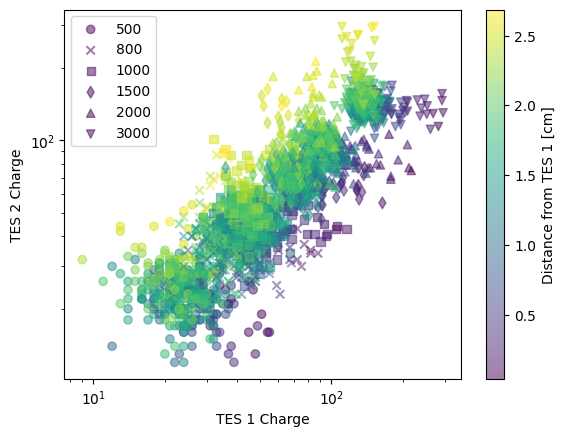

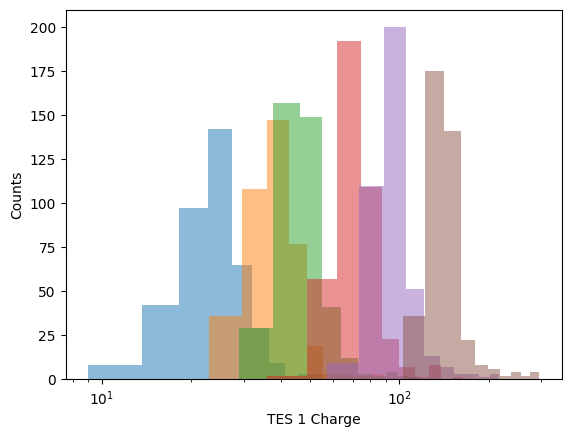

In [8]:
#distance from TES vs charge
diff = initial_positions - TES_1_position
scaled_diff = diff * np.array([d1, d2, z])
distances =  (scaled_diff)**2
distances =  (distances.sum(1))**0.5

points_style = ['o', 'x', 's', 'd', '^', 'v', '<', '>', 'p', 'h']

for p in charges_n_sims:
    n = p[0]
    charges = np.array(p[1])
    plt.scatter( charges[:,0].flatten(), charges[:,1].flatten(), alpha=0.5, label=n, c=distances, marker=points_style.pop(0))
# plt.scatter( charges_xyz[:,:,0,0].flatten(), charges_xyz[:,:,0,1].flatten(), alpha=0.5)

plt.xlabel("TES 1 Charge")
plt.ylabel("TES 2 Charge")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.colorbar(label="Distance from TES 1 [cm]")
plt.savefig(f"banana_energies.pdf")
plt.show()

#histogram of the charges
for p in charges_n_sims:
    n = p[0]
    charges = np.array(p[1])
    plt.hist( charges[:,0].flatten(), bins=10, alpha=0.5, label=n)

plt.xscale("log")
plt.xlabel("TES 1 Charge")
plt.ylabel("Counts")
plt.savefig(f"hist_charges.pdf")
plt.show()

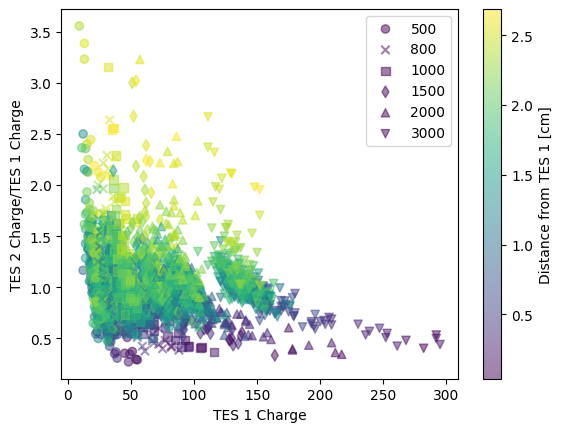

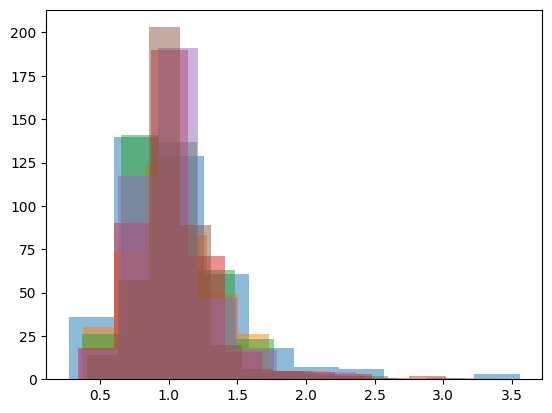

In [9]:
#distance from TES vs charge
diff = initial_positions - TES_1_position
scaled_diff = diff * np.array([d1, d2, z])
distances =  (scaled_diff)**2
distances =  (distances.sum(1))**0.5

points_style = ['o', 'x', 's', 'd', '^', 'v', '<', '>', 'p', 'h']

for p in charges_n_sims:
    n = p[0]
    charges = np.array(p[1])
    plt.scatter( charges[:,0].flatten(), charges[:,1].flatten()/charges[:,0].flatten(), alpha=0.5, label=n, c=distances, marker=points_style.pop(0))
# plt.scatter( charges_xyz[:,:,0,0].flatten(), charges_xyz[:,:,0,1].flatten(), alpha=0.5)

plt.xlabel("TES 1 Charge")
plt.ylabel("TES 2 Charge/TES 1 Charge")
plt.legend()
#plt.xscale("log")
#plt.yscale("log")
plt.colorbar(label="Distance from TES 1 [cm]")
plt.savefig(f"banana_energies_ratio.pdf")
plt.show()

#histogram of the ratio
for p in charges_n_sims:
    n = p[0]
    charges = np.array(p[1])
    plt.hist( charges[:,1].flatten()/charges[:,0].flatten(), bins=10, alpha=0.5, label=n)
plt.show()

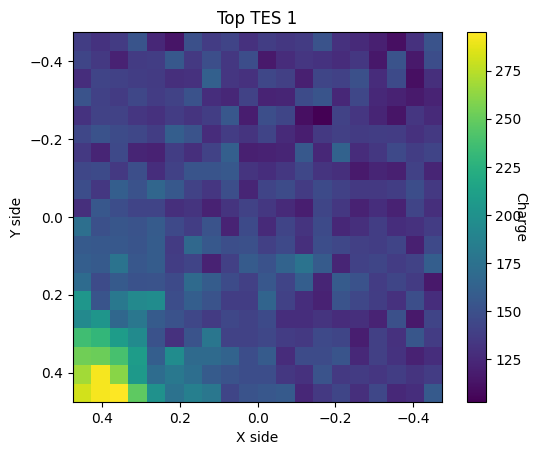

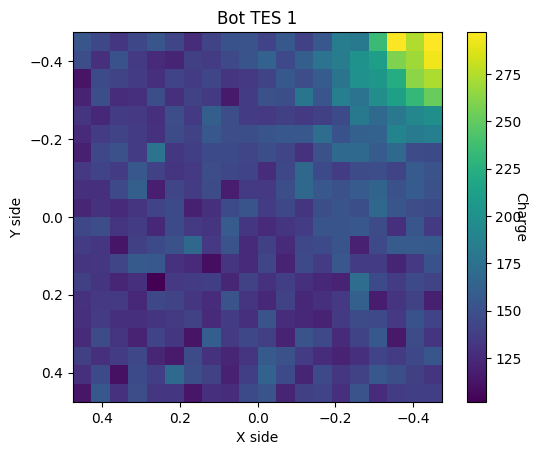

In [10]:
charges_xyz = charges_arr.reshape( (len(dx), len(dy), len(dz), 2) )

plt.imshow( charges_xyz[:,:,:,0], origin='lower', extent=[dx[0], dx[-1], dy[0], dy[-1]] )
plt.title("Top TES 1")
cbar = plt.colorbar()
cbar.set_label("Charge", rotation=270)
plt.xlabel("X side")
plt.ylabel("Y side")
plt.show()

plt.imshow( charges_xyz[:,:,:, 1], origin='lower', extent=[dx[0], dx[-1], dy[0], dy[-1]] )
plt.title("Bot TES 1")
cbar = plt.colorbar()
cbar.set_label("Charge", rotation=270)
plt.xlabel("X side")
plt.ylabel("Y side")
plt.show()

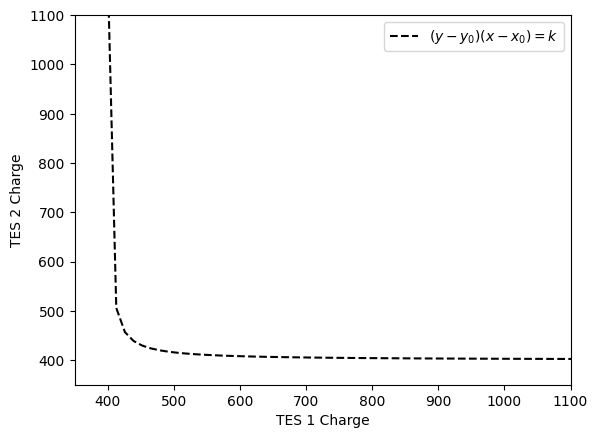

In [11]:

#scatter plot of charges
charges_linear = np.linspace( 400, 1700, 100 )

plt.scatter( charges_xyz[:,:,0,0].flatten(), charges_xyz[:,:,0,1].flatten(), alpha=0.5)
plt.plot( charges_linear, 400 + 1600 / (charges_linear - 398), 'k--', label="$(y-y_0)(x-x_0)=k$")

plt.xlabel("TES 1 Charge")
plt.ylabel("TES 2 Charge")
plt.legend()
plt.ylim(350, 1100)
plt.xlim(350, 1100)
plt.savefig(f"banana{n}_edges.pdf")
plt.show()

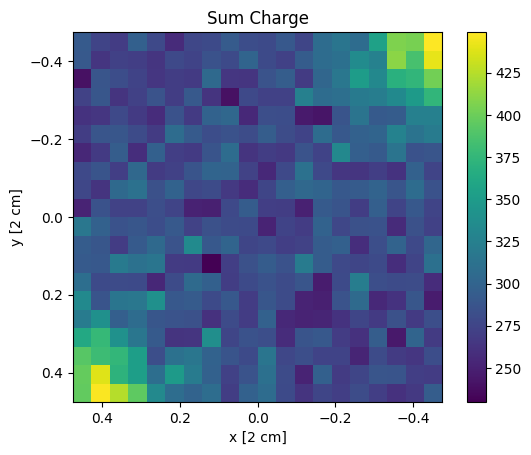

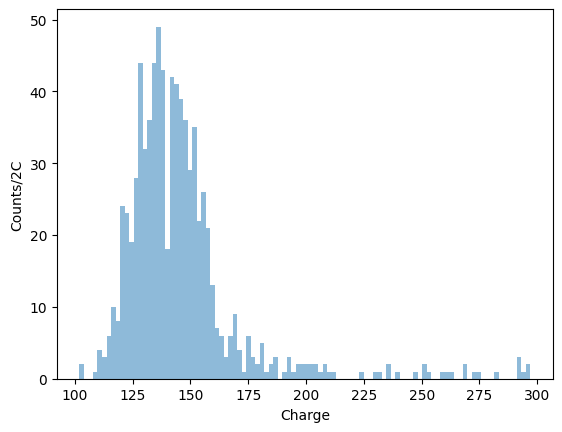

In [12]:
plt.imshow( charges_xyz[:,:,0].sum(2), origin='lower', extent=[dx[0], dx[-1], dy[0], dy[-1]] )
plt.title("Sum Charge")
plt.colorbar()
plt.xlabel(f"x [{d1} cm]")
plt.ylabel(f"y [{d1} cm]")
plt.show()

hist_charge = charges_xyz[:,:,:].sum(2).flatten()
diff = max(hist_charge) - min(hist_charge)
plt.hist( charges_xyz[:,:,:].sum(2).flatten(), bins=100, alpha=0.5, label="Top side")
plt.ylabel(f"Counts/{diff/100:.0f}C")
plt.xlabel(f"Charge")
plt.show()

In [13]:
np.save(f"charges_xyz_excess_{n}.npy", charges_xyz)

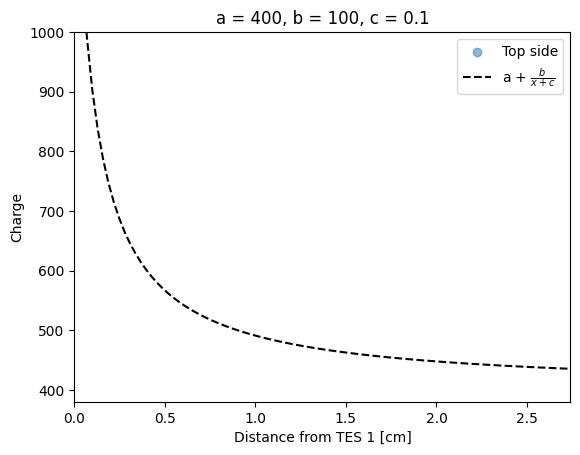

In [14]:
#distance from TES vs charge
diff = initial_positions - TES_1_position
scaled_diff = diff * np.array([d1, d2, z])
distances =  (scaled_diff)**2
distances =  (distances.sum(1))**0.5

x_vals = np.linspace(min(distances), max(distances)+0.3, 100)
plt.scatter( distances, charges_arr[:,0], alpha=0.5, label="Top side")
plt.plot( x_vals, 400 + 100/(x_vals+0.1), "--k", label=f"a + $\\frac{{b}}{{x+c}}$" )
plt.title("a = 400, b = 100, c = 0.1")
plt.xlabel("Distance from TES 1 [cm]")
plt.ylabel("Charge")
plt.legend()
plt.xlim(0, 2.74)
plt.ylim(380, 1000)
plt.show()


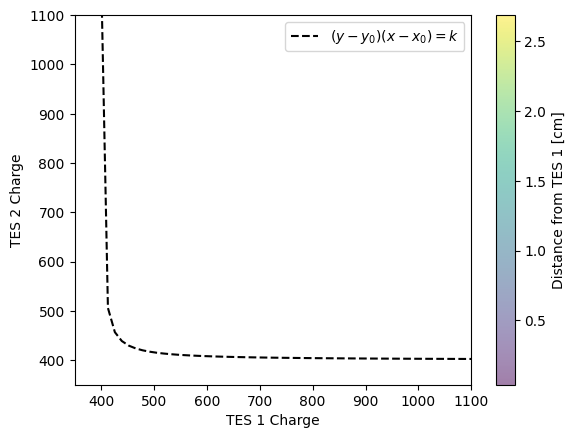

In [15]:

#scatter plot of charges
charges_linear = np.linspace( 400, 1700, 100 )

plt.scatter( charges_xyz[:,:,0,0].flatten(), charges_xyz[:,:,0,1].flatten(), c=distances, alpha=0.5)
plt.plot( charges_linear, 400 + 1600 / (charges_linear - 398), 'k--', label="$(y-y_0)(x-x_0)=k$")

plt.xlabel("TES 1 Charge")
plt.ylabel("TES 2 Charge")
plt.legend()
plt.ylim(350, 1100)
plt.xlim(350, 1100)
plt.colorbar(label="Distance from TES 1 [cm]")
plt.savefig(f"banana{n}_edges_distances.pdf")
plt.show()

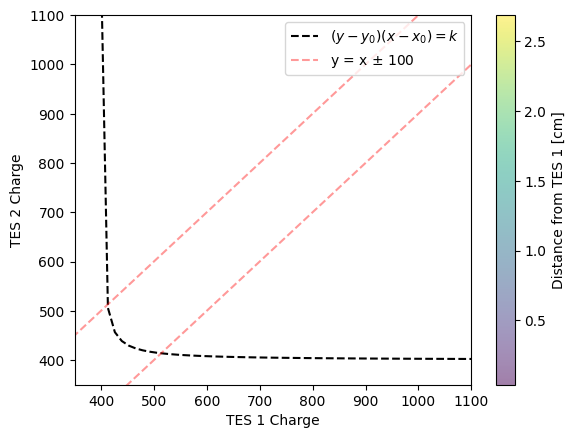

In [16]:
charges_linear = np.linspace( 400, 1700, 100 )
lines = np.linspace(300, 1700, 100)

plt.scatter( charges_xyz[:,:,0,0].flatten(), charges_xyz[:,:,0,1].flatten(), c=distances, alpha=0.5)
plt.plot( charges_linear, 400 + 1600 / (charges_linear - 398), 'k--', label="$(y-y_0)(x-x_0)=k$")
plt.plot( lines, lines - 100, 'r--', label="y = x $\pm$ 100", alpha=0.4)
plt.plot( lines, lines + 100, 'r--', alpha=0.4)


plt.xlabel("TES 1 Charge")
plt.ylabel("TES 2 Charge")
plt.legend(loc='upper right')
plt.ylim(350, 1100)
plt.xlim(350, 1100)
plt.colorbar(label="Distance from TES 1 [cm]")
plt.savefig(f"banana{n}_edges_distances.pdf")
plt.show()

In [17]:
temp = charges_xyz[:,:,0,0].flatten()
print( len(temp[temp < 600])/len(temp) )

1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


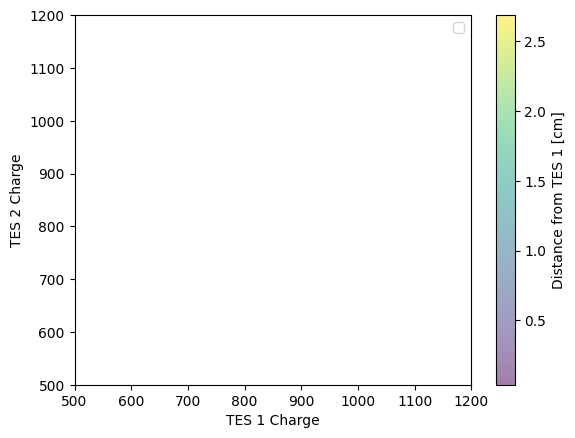

In [18]:
#scatter plot of charges
charges_linear = np.linspace( 400, 1700, 100 )
temp_0 = charges_xyz[:,:,0,0].flatten()
temp_1 = charges_xyz[:,:,0,1].flatten()

temp_0_new = temp_0 + 0.3 * temp_1
temp_1_new = temp_1 + 0.3 * temp_0

plt.scatter( temp_0_new, temp_1_new, c=distances, alpha=0.5)
#plt.plot( charges_linear, 400 + 1600 / (charges_linear - 398), 'k--', label="$(y-y_0)(x-x_0)=k$")

plt.xlabel("TES 1 Charge")
plt.ylabel("TES 2 Charge")
plt.legend()
plt.ylim(500, 1200)
plt.xlim(500, 1200)
plt.colorbar(label="Distance from TES 1 [cm]")
plt.savefig(f"boomerang_{n}_edges_distances_thermal.pdf")
plt.show()